In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ssn
import warnings
warnings.filterwarnings('ignore')

In [162]:
pd.set_option('display.max_columns',500)
train=pd.read_csv('train.csv')

#Look at the first 5 rows
train.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [163]:
#Shape of the dataset

train.shape

(69999, 172)

Indicates that there are nearly 70k rows and 172 columns

In [164]:
train.columns[(train.nunique()<=1)]

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

#### Observations---

There are 13 columns where only one value is present in the entire column. These columns do not serve any purpose in predicting the churn cases. So we can directly remove them.

In [165]:
train.drop(columns=train.columns[(train.nunique()<=1)],axis=1,inplace=True)

In [166]:
train.columns[train.isna().sum()>0]

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6',
       ...
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object', length=114)

#### Observations---

We have nearly 114 columns having null values.

In [167]:
train.columns[train.isna().sum()>1]

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6',
       ...
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object', length=114)

In [168]:
train[(train['date_of_last_rech_6'].isna()) & (train['date_of_last_rech_7'].isna()) & (train['date_of_last_rech_8'].isna())].head(10)

id   arpu_6   arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
498    498   86.441  137.788    7.49        11.11        56.81          0.0   
2324  2324  195.010    0.000    0.00          NaN          NaN          NaN   
4905  4905  331.500   81.110    0.00       234.29         0.00          NaN   
5706  5706  777.000    0.000    0.00          NaN          NaN          NaN   
5832  5832  563.390    0.000    0.00          NaN          NaN          NaN   
7242  7242    0.000  423.082    0.00          NaN          NaN          NaN   
7291  7291  192.500    0.000    0.00          NaN          NaN          NaN   
7451  7451  196.000    0.000    0.00          NaN          NaN          NaN   
7709  7709    6.200    0.000  167.00          NaN          NaN          NaN   
8836  8836    0.000  619.700    0.00          NaN         0.00          NaN   

      offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
498          94.76        168.18           0.0            0.0            0.0   
2324           NaN           NaN           NaN            NaN            NaN   
4905        302.39         37.98           NaN            0.0            0.0   
5706           NaN           NaN           NaN            NaN            NaN   
5832           NaN           NaN           NaN            NaN            NaN   
7242           NaN           NaN           NaN            NaN            NaN   
7291           NaN           NaN           NaN            NaN            NaN   
7451           NaN           NaN           NaN            NaN            NaN   
7709           NaN           NaN           NaN            NaN            NaN   
8836           NaN          3.94           NaN            NaN            0.0   

      roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
498             0.0            0.0            0.0            0.0   
2324            NaN            NaN            NaN            NaN   
4905            NaN            0.0            0.0            NaN   
5706            NaN            NaN            NaN            NaN   
5832            NaN            NaN            NaN            NaN   
7242            NaN            NaN            NaN            NaN   
7291            NaN            NaN            NaN            NaN   
7451            NaN            NaN            NaN            NaN   
7709            NaN            NaN            NaN            NaN   
8836            NaN            NaN            0.0            NaN   

      loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
498              11.11             56.81               0.0             88.69   
2324               NaN               NaN               NaN               NaN   
4905            104.19              0.00               NaN            208.36   
5706               NaN               NaN               NaN               NaN   
5832               NaN               NaN               NaN               NaN   
7242               NaN               NaN               NaN               NaN   
7291               NaN               NaN               NaN               NaN   
7451               NaN               NaN               NaN               NaN   
7709               NaN               NaN               NaN               NaN   
8836               NaN              0.00               NaN               NaN   

      loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
498             152.74               0.0              4.53              3.06   
2324               NaN               NaN               NaN               NaN   
4905              0.00               NaN              4.89              0.00   
5706               NaN               NaN               NaN               NaN   
5832               NaN               NaN               NaN               NaN   
7242               NaN               NaN               NaN               NaN   
7291               NaN               NaN               NaN         

#### Observations--

We can see that there are customers who havent did recharge in the last 3 months and also these customers didnt do data recharge also. They had only incoming calls. There are high chances that these customers can churn as there is no data/out going usage.

#### --------

We can derive 2 new features date_of_last_rech and date_of_last_rech_data, these two new features will have the date when they have did the last recharge. If they havent done recharge in month 8 we will take from month 7 else 6 else we will assume they did a recharge in Month 5 considering that the Grace period is 90 days as after that services will be stopped for them and cannot use. We will also drop these other columns from which the new features got derived as these are of no use.

In [169]:
train['date_of_last_rech']=train.apply(lambda x: x['date_of_last_rech_8'] if (not pd.isnull(x['date_of_last_rech_8'])) else (x['date_of_last_rech_7'] if (not pd.isnull(x['date_of_last_rech_7'])) else (x['date_of_last_rech_6'] if (not pd.isnull(x['date_of_last_rech_6'])) else "5/30/2014")),axis=1)

In [170]:
train['date_of_last_rech_data']=train.apply(lambda x: x['date_of_last_rech_data_8'] if (not pd.isnull(x['date_of_last_rech_data_8'])) else (x['date_of_last_rech_data_7'] if (not pd.isnull(x['date_of_last_rech_data_7'])) else (x['date_of_last_rech_data_6'] if (not pd.isnull(x['date_of_last_rech_data_6'])) else "5/30/2014")),axis=1)

In [171]:
train.drop(columns=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1,inplace=True)

#### Null Values

In [172]:
for col in train.columns:
  print(f'{col}: {round((train[col].isna().sum()/train.shape[0])*100,2)}%')

id: 0.0%
arpu_6: 0.0%
arpu_7: 0.0%
arpu_8: 0.0%
onnet_mou_6: 3.95%
onnet_mou_7: 3.84%
onnet_mou_8: 5.29%
offnet_mou_6: 3.95%
offnet_mou_7: 3.84%
offnet_mou_8: 5.29%
roam_ic_mou_6: 3.95%
roam_ic_mou_7: 3.84%
roam_ic_mou_8: 5.29%
roam_og_mou_6: 3.95%
roam_og_mou_7: 3.84%
roam_og_mou_8: 5.29%
loc_og_t2t_mou_6: 3.95%
loc_og_t2t_mou_7: 3.84%
loc_og_t2t_mou_8: 5.29%
loc_og_t2m_mou_6: 3.95%
loc_og_t2m_mou_7: 3.84%
loc_og_t2m_mou_8: 5.29%
loc_og_t2f_mou_6: 3.95%
loc_og_t2f_mou_7: 3.84%
loc_og_t2f_mou_8: 5.29%
loc_og_t2c_mou_6: 3.95%
loc_og_t2c_mou_7: 3.84%
loc_og_t2c_mou_8: 5.29%
loc_og_mou_6: 3.95%
loc_og_mou_7: 3.84%
loc_og_mou_8: 5.29%
std_og_t2t_mou_6: 3.95%
std_og_t2t_mou_7: 3.84%
std_og_t2t_mou_8: 5.29%
std_og_t2m_mou_6: 3.95%
std_og_t2m_mou_7: 3.84%
std_og_t2m_mou_8: 5.29%
std_og_t2f_mou_6: 3.95%
std_og_t2f_mou_7: 3.84%
std_og_t2f_mou_8: 5.29%
std_og_mou_6: 3.95%
std_og_mou_7: 3.84%
std_og_mou_8: 5.29%
isd_og_mou_6: 3.95%
isd_og_mou_7: 3.84%
isd_og_mou_8: 5.29%
spl_og_mou_6: 3.95%
spl_o

#### Observations-

1.There are many features having 3-5% null values.

2.There are around 10-15 features having more than 70% null values.


Here it is safe to assume that if a feature taking recharge has a null value means user didnt do recharge. So we can fill it with 0.

In [173]:
for col in train.columns[train.isna().sum()>0]:
    if 'rech' in col:
        train[col].fillna(0,inplace=True)
for col in train.columns:
  print(f'{col}: {round((train[col].isna().sum()/train.shape[0])*100,2)}%')

id: 0.0%
arpu_6: 0.0%
arpu_7: 0.0%
arpu_8: 0.0%
onnet_mou_6: 3.95%
onnet_mou_7: 3.84%
onnet_mou_8: 5.29%
offnet_mou_6: 3.95%
offnet_mou_7: 3.84%
offnet_mou_8: 5.29%
roam_ic_mou_6: 3.95%
roam_ic_mou_7: 3.84%
roam_ic_mou_8: 5.29%
roam_og_mou_6: 3.95%
roam_og_mou_7: 3.84%
roam_og_mou_8: 5.29%
loc_og_t2t_mou_6: 3.95%
loc_og_t2t_mou_7: 3.84%
loc_og_t2t_mou_8: 5.29%
loc_og_t2m_mou_6: 3.95%
loc_og_t2m_mou_7: 3.84%
loc_og_t2m_mou_8: 5.29%
loc_og_t2f_mou_6: 3.95%
loc_og_t2f_mou_7: 3.84%
loc_og_t2f_mou_8: 5.29%
loc_og_t2c_mou_6: 3.95%
loc_og_t2c_mou_7: 3.84%
loc_og_t2c_mou_8: 5.29%
loc_og_mou_6: 3.95%
loc_og_mou_7: 3.84%
loc_og_mou_8: 5.29%
std_og_t2t_mou_6: 3.95%
std_og_t2t_mou_7: 3.84%
std_og_t2t_mou_8: 5.29%
std_og_t2m_mou_6: 3.95%
std_og_t2m_mou_7: 3.84%
std_og_t2m_mou_8: 5.29%
std_og_t2f_mou_6: 3.95%
std_og_t2f_mou_7: 3.84%
std_og_t2f_mou_8: 5.29%
std_og_mou_6: 3.95%
std_og_mou_7: 3.84%
std_og_mou_8: 5.29%
isd_og_mou_6: 3.95%
isd_og_mou_7: 3.84%
isd_og_mou_8: 5.29%
spl_og_mou_6: 3.95%
spl_o

#### Observations---

1.Still have features with more than 70% Null values. Features like night_pck_user and FB_user might be special top ups so lets impute the null values to zero and drop the remaining features having high null values. 

In [174]:
train.drop(columns=['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

In [175]:
for col in train.columns[train.isna().sum()>0]:
    train[col].fillna(0,inplace=True)
train.columns[train.isna().sum()>0]

Index([], dtype='object')

In [176]:
for col in train.columns:
  print(f'{col}: {round((train[col].isna().sum()/train.shape[0])*100,2)}%')

id: 0.0%
arpu_6: 0.0%
arpu_7: 0.0%
arpu_8: 0.0%
onnet_mou_6: 0.0%
onnet_mou_7: 0.0%
onnet_mou_8: 0.0%
offnet_mou_6: 0.0%
offnet_mou_7: 0.0%
offnet_mou_8: 0.0%
roam_ic_mou_6: 0.0%
roam_ic_mou_7: 0.0%
roam_ic_mou_8: 0.0%
roam_og_mou_6: 0.0%
roam_og_mou_7: 0.0%
roam_og_mou_8: 0.0%
loc_og_t2t_mou_6: 0.0%
loc_og_t2t_mou_7: 0.0%
loc_og_t2t_mou_8: 0.0%
loc_og_t2m_mou_6: 0.0%
loc_og_t2m_mou_7: 0.0%
loc_og_t2m_mou_8: 0.0%
loc_og_t2f_mou_6: 0.0%
loc_og_t2f_mou_7: 0.0%
loc_og_t2f_mou_8: 0.0%
loc_og_t2c_mou_6: 0.0%
loc_og_t2c_mou_7: 0.0%
loc_og_t2c_mou_8: 0.0%
loc_og_mou_6: 0.0%
loc_og_mou_7: 0.0%
loc_og_mou_8: 0.0%
std_og_t2t_mou_6: 0.0%
std_og_t2t_mou_7: 0.0%
std_og_t2t_mou_8: 0.0%
std_og_t2m_mou_6: 0.0%
std_og_t2m_mou_7: 0.0%
std_og_t2m_mou_8: 0.0%
std_og_t2f_mou_6: 0.0%
std_og_t2f_mou_7: 0.0%
std_og_t2f_mou_8: 0.0%
std_og_mou_6: 0.0%
std_og_mou_7: 0.0%
std_og_mou_8: 0.0%
isd_og_mou_6: 0.0%
isd_og_mou_7: 0.0%
isd_og_mou_8: 0.0%
spl_og_mou_6: 0.0%
spl_og_mou_7: 0.0%
spl_og_mou_8: 0.0%
og_others_

## EDA

In [177]:
train.describe()

id        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean   34999.000000    283.134365    278.185912    278.858826    127.887939   
std    20207.115084    334.213918    344.366927    351.924315    295.115497   
min        0.000000  -2258.709000  -1289.715000   -945.808000      0.000000   
25%    17499.500000     93.581000     86.714000     84.095000      5.430000   
50%    34999.000000    197.484000    191.588000    192.234000     30.830000   
75%    52498.500000    370.791000    365.369500    369.909000    113.100000   
max    69998.000000  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean     128.754731    125.943607    191.010582    189.585401    186.146273   
std      306.326345    304.990552    312.900706    318.492632    318.453812   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        4.910000      4.110000     28.790000     26.690000     23.780000   
50%       29.160000     27.840000     89.810000     85.590000     83.010000   
75%      108.940000    106.280000    223.540000    218.350000    216.410000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   69999.000000   69999.000000   69999.000000   69999.000000   
mean        9.379276       6.745305       6.634328      13.625476   
std        56.260778      54.892940      51.999899      72.055036   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   69999.000000   69999.000000      69999.000000      69999.000000   
mean        9.464386       9.254848         45.050076         44.394344   
std        57.409013      62.923987        148.238746        151.998993   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.010000          1.010000   
50%         0.000000       0.000000         10.660000         10.430000   
75%         0.000000       0.000000         38.680000         37.780000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean          43.269280         89.551272         87.313796         86.301054   
std          149.944829        159.846546        151.875981        150.286404   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.760000          7.290000          7.530000          6.440000   
50%           10.060000         37.680000         37.010000         35.940000   
75%           37.260000        105.685000        103.330000        103.110000   
max        10752.560000       4696.830000       4557.140000       4961.330000   

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean           3.595161          3.632045          3.467948          1.081499   
std           13.073900         13.324919         12.686917          5.631416   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000  

#### Observations---

1.For most of the features 75% values are 0 and we have high max value. This indicates that these are high value customers(wrt recharge features) and high usage customers. We cannot treat these as outliers because they are heavy users. And we cannot drop the 0 value rows because these can be using data highly or having high outgoing calls like that.


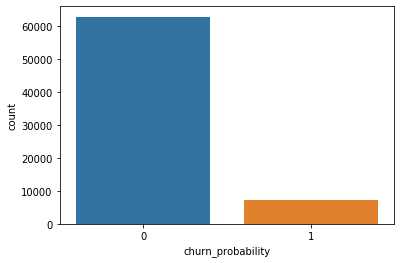

In [178]:
ssn.countplot(train['churn_probability'])
plt.show()

#### Observations----

This is a class imbalance problem as we can see the ratio of 0:1 is nearly 10:1

In [179]:
train['churn_probability'].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

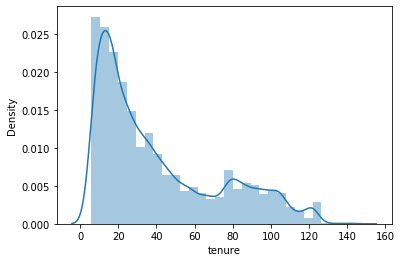

In [180]:
# Deriving new Feature Tenure - number of months since customer has joined 
train['tenure'] = (train['aon']/30).round(0)
ssn.distplot(train['tenure'],bins=30)
plt.show()

#### Observations---

With increase in number of months the churn also decreasing.

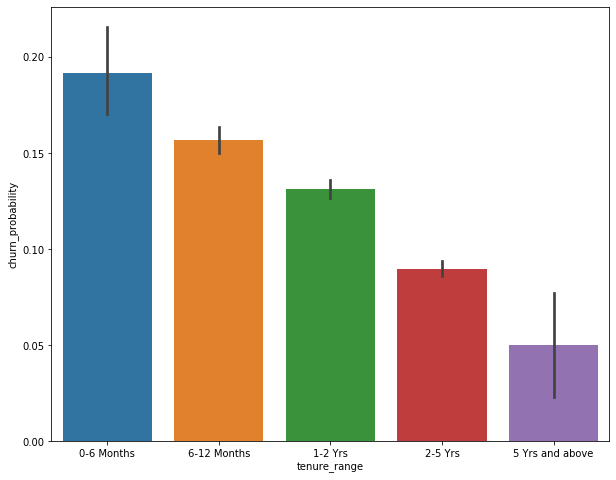

In [181]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
train['tenure_range'] = pd.cut(train['tenure'], tn_range, labels=tn_label)
plt.figure(figsize=[10,8])
ssn.barplot(x='tenure_range',y='churn_probability', data=train)
plt.show()

#### Observations---

Customers are more likely to churn in the initial months and then it decreases.

In [182]:
# Dropping tenure_range and tenure as aon and these two feature represent the same.

train.drop(columns=['tenure','tenure_range'],axis=1,inplace=True)

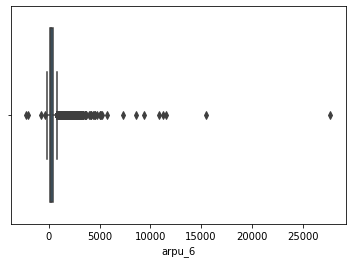

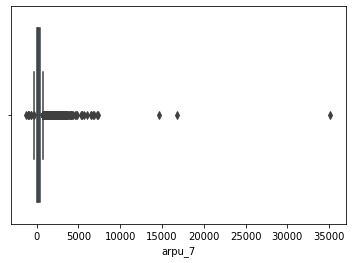

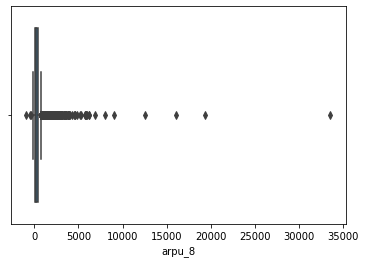

In [183]:
for col in ['arpu_6','arpu_7','arpu_8']:
    ssn.boxplot(train[col])
    plt.show()

#### Observations---

We can see min value is zero and gradually increasing. We see few values as outliers but these are high value customers.

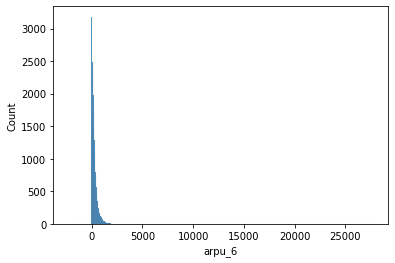

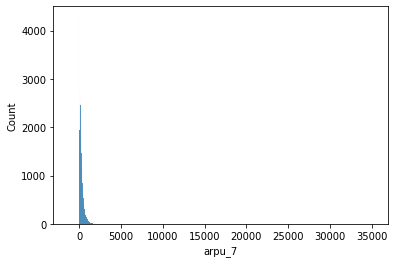

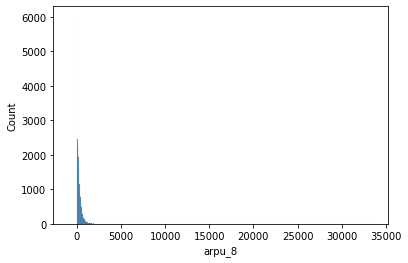

In [184]:
for col in ['arpu_6','arpu_7','arpu_8']:
    ssn.histplot(train[col])
    plt.show()

#### Observations---

Usage is decreasing with months suggesting they might leave this operator

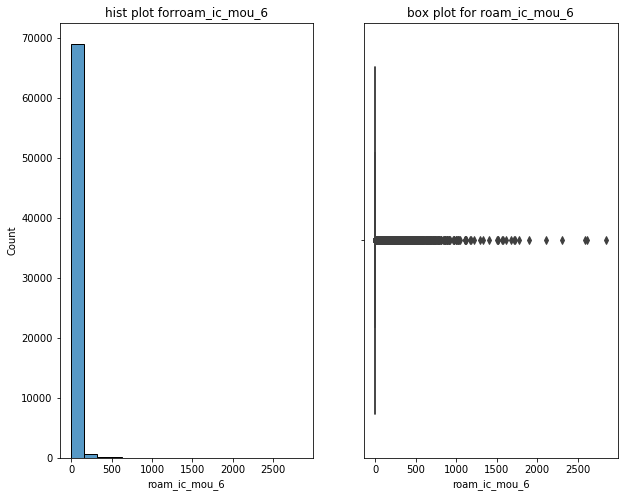

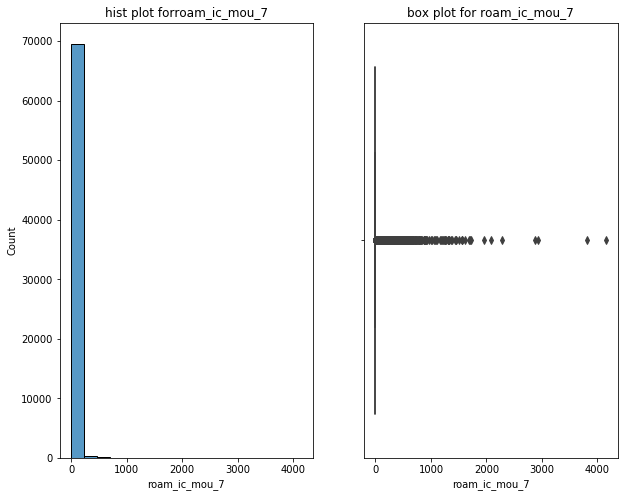

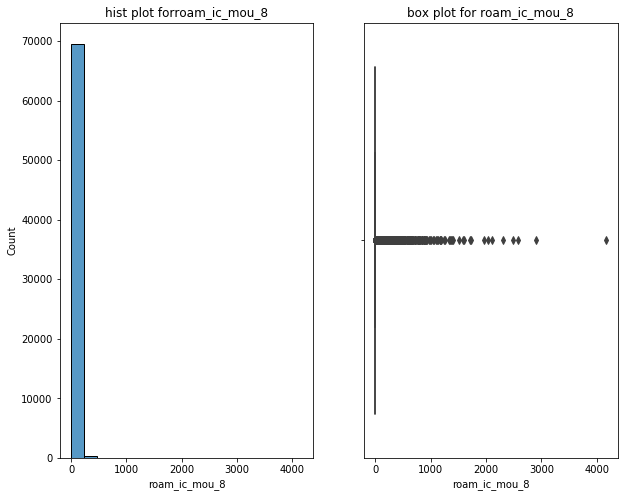

In [185]:
for col in ['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']:
    plt.figure(figsize=[10,8])
    plt.subplot(1,2,1)
    plt.title("hist plot for" + col)
    ssn.histplot(train[col])
    plt.subplot(1,2,2)
    plt.title("box plot for " + col)    
    ssn.boxplot(train[col])
    plt.show()

#### Observations---

For majority of customers they dont have roaming ic calls. Implies they dont travel much.

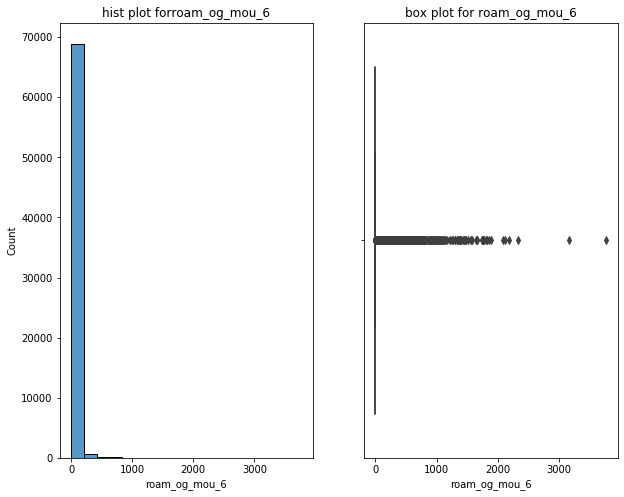

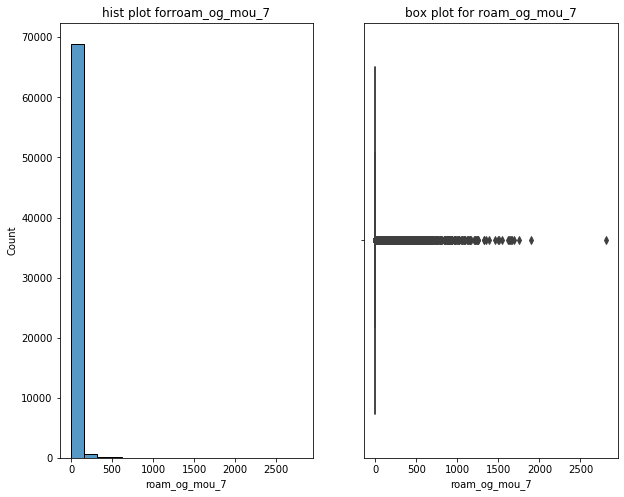

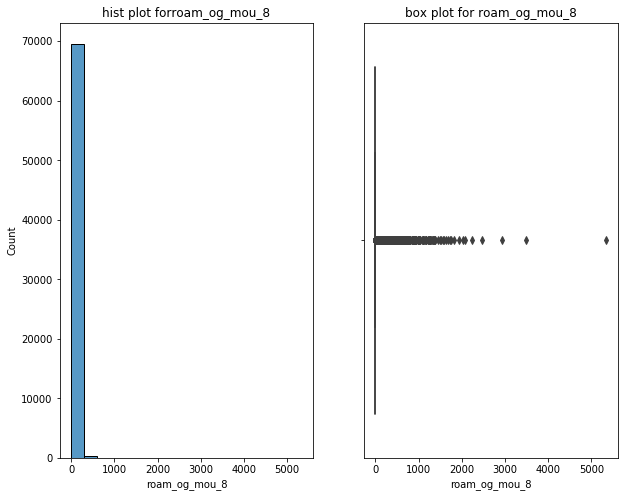

In [186]:
for col in ['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']:
    plt.figure(figsize=[10,8])
    plt.subplot(1,2,1)
    plt.title("hist plot for" + col)
    ssn.histplot(train[col])
    plt.subplot(1,2,2)
    plt.title("box plot for " + col)    
    ssn.boxplot(train[col])
    plt.show()

#### Observations---

Roaming outgoing is also similar to incoming indicating that customer wont travel much.

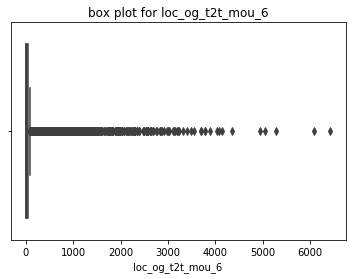

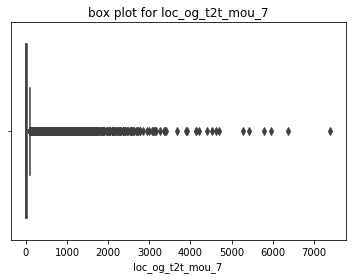

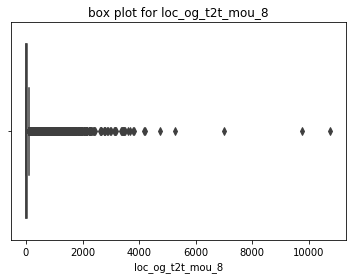

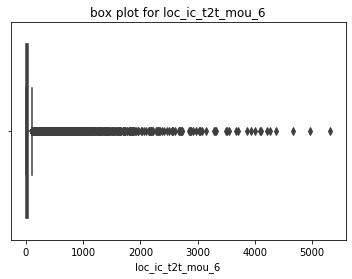

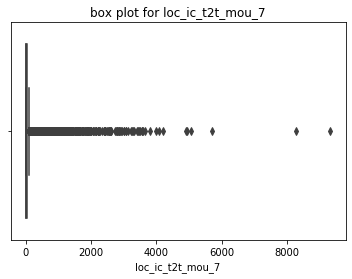

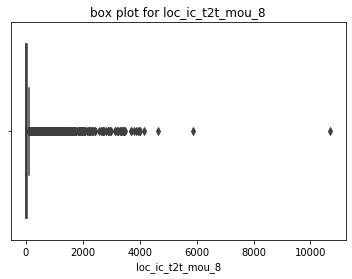

In [187]:
for col in ['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8']  :    
    plt.title("box plot for " + col)    
    ssn.boxplot(train[col])
    plt.show()

#### Observations---

Minutes of usage for Local Outgoing and Incoming Call to the same network. For same network the number of call remain almost same across the months and having high values as close as 10K.

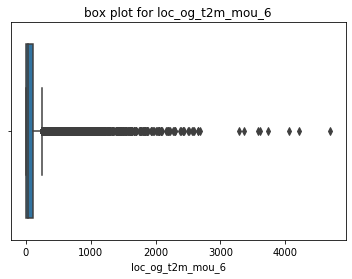

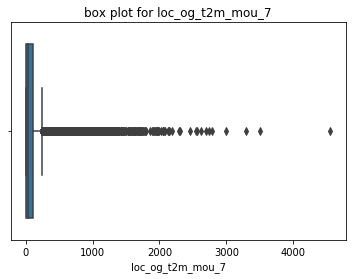

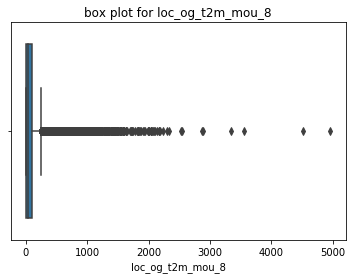

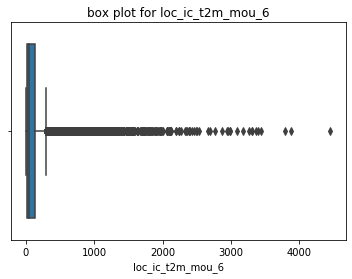

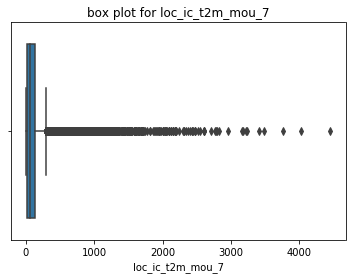

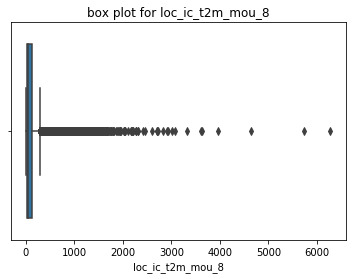

In [188]:
for col in ['loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8']  :    
    plt.title("box plot for " + col)    
    ssn.boxplot(train[col])
    plt.show()

#### Observations---

Minutes of usage for local incoming and outgoing calls to different operator.
Comapred to same network usage othernetwork it is very less with highest value being around 6k

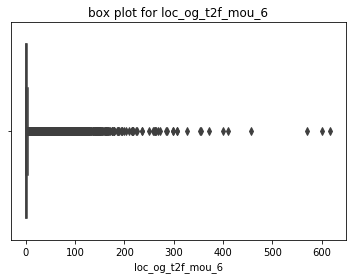

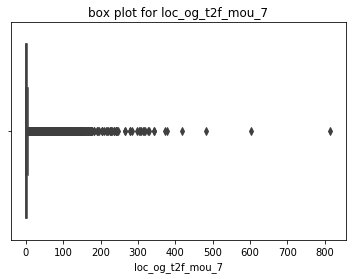

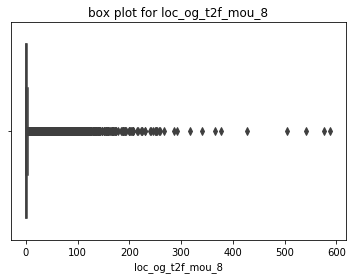

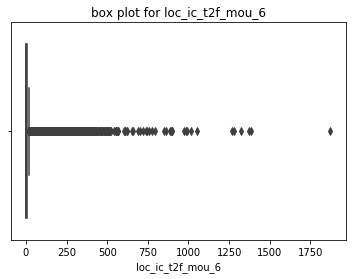

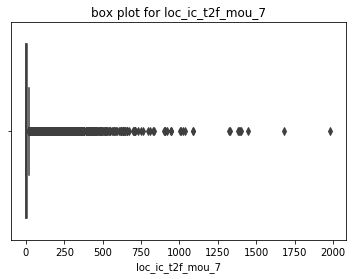

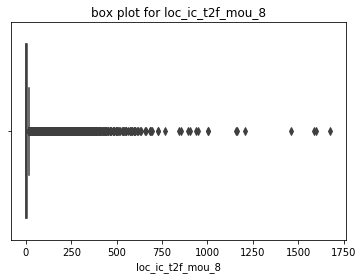

In [189]:
###  Minutes of usage for local incoming and outgoing calls to other operator using fixed lines.
for col in ['loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8']  :    
    plt.title("box plot for " + col)    
    ssn.boxplot(train[col])
    plt.show()

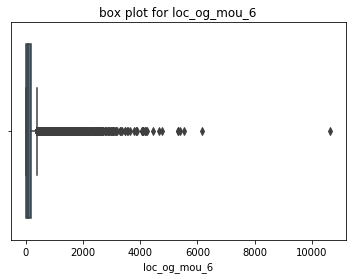

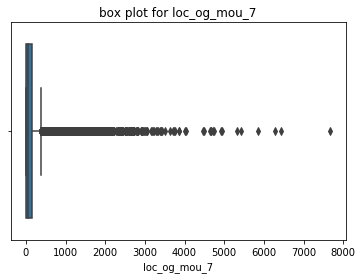

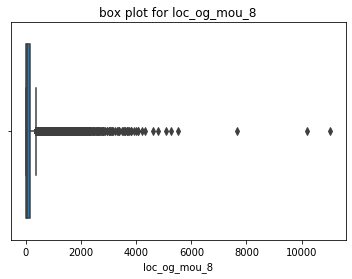

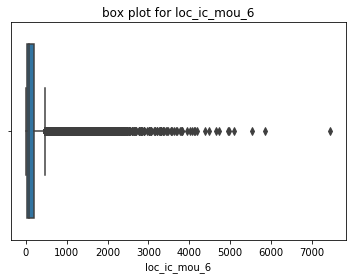

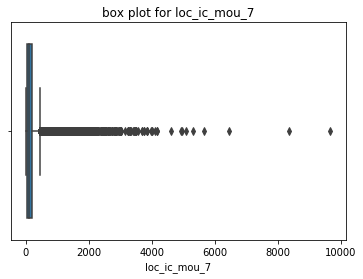

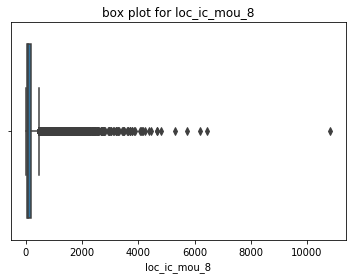

In [190]:
for col in ['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8']  :    
    plt.title("box plot for " + col)    
    ssn.boxplot(train[col])
    plt.show()

#### Observations---

Total local outgoing and incoming calls made in the respective months.

##### Minutes of Usage of Outgoing and incoming STD Calls from mobile to mobile with same operator

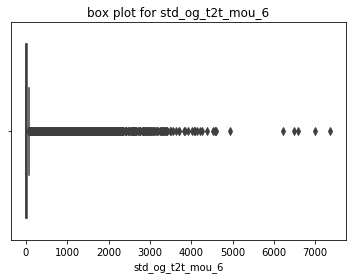

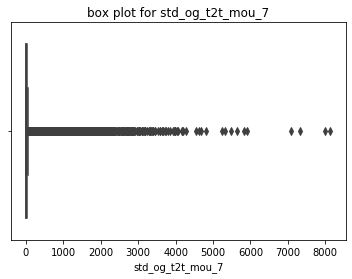

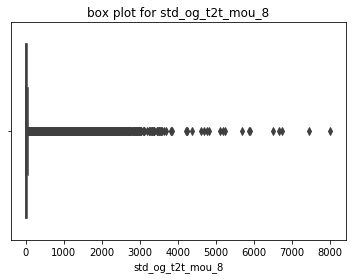

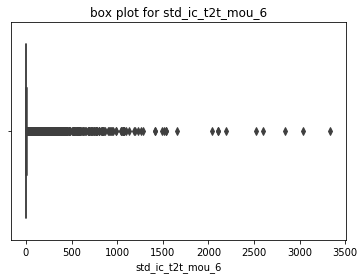

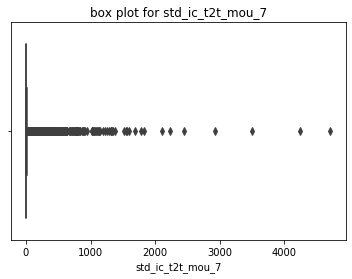

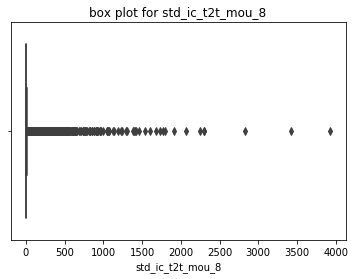

In [191]:
for col in ['std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8']  :    
    plt.title("box plot for " + col)    
    ssn.boxplot(train[col])
    plt.show()

#### Observations---

Around 50% values are null so STD call across the same operator are less.

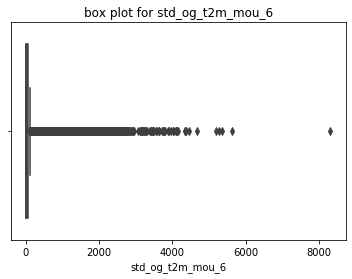

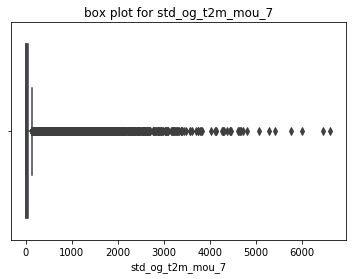

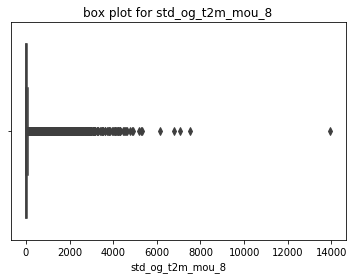

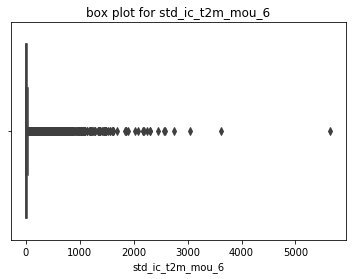

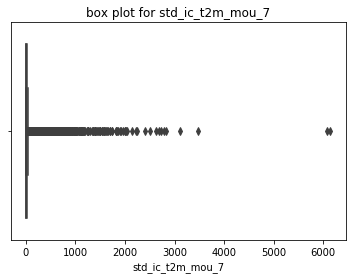

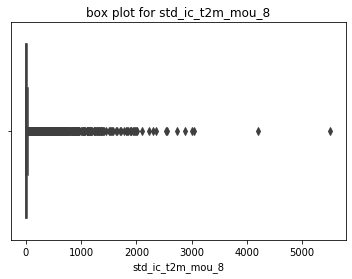

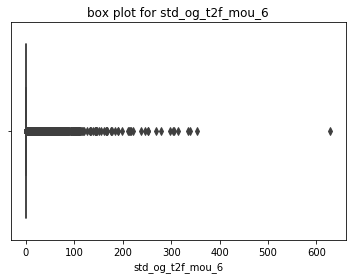

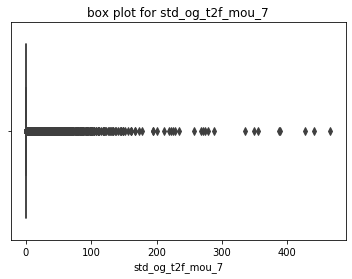

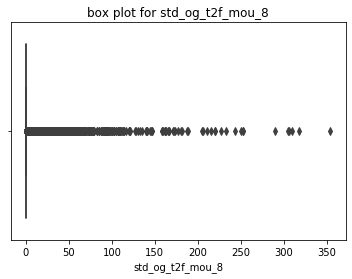

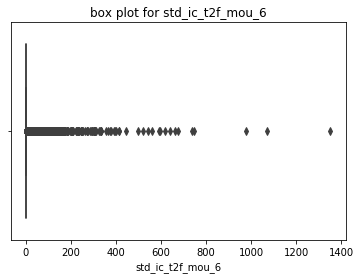

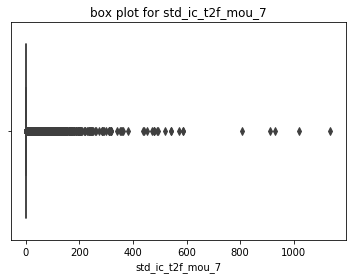

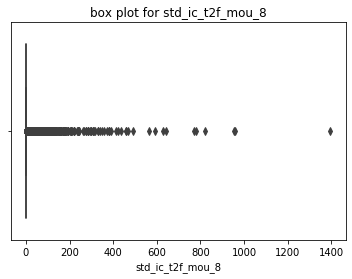

In [192]:
for col in ['std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8']  :    
    plt.title("box plot for " + col)    
    ssn.boxplot(train[col])
    plt.show()
    
for col in ['std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8']  :    
    plt.title("box plot for " + col)    
    ssn.boxplot(train[col])
    plt.show()

#### Observations---

To other operators, STD calls are very less with 50% values being 0.

To other operators with fixed lines, STD calls are even less with 90% of values being 0.

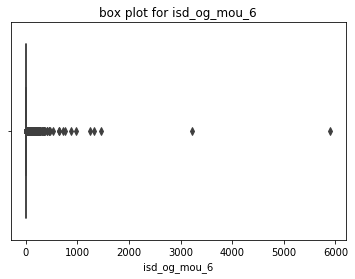

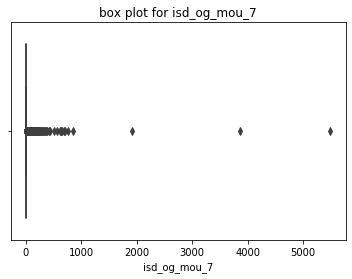

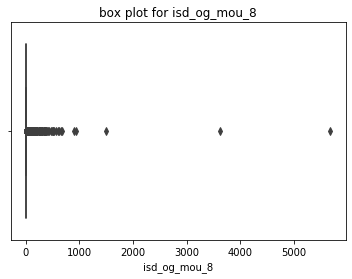

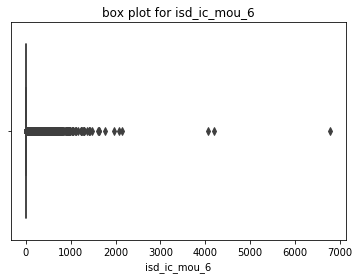

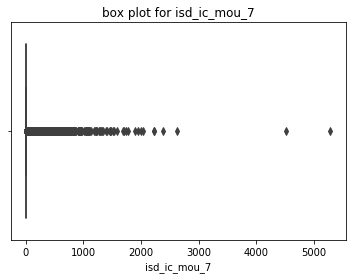

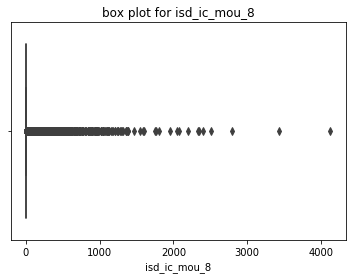

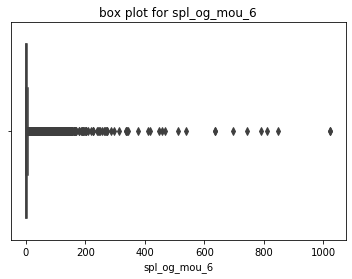

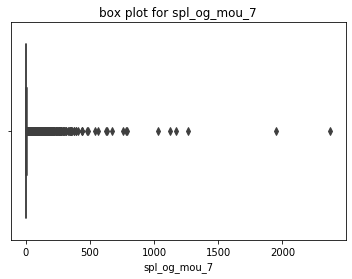

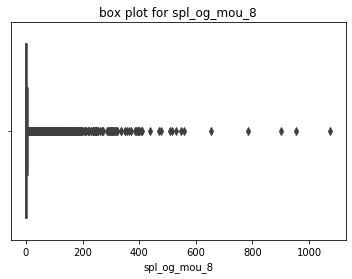

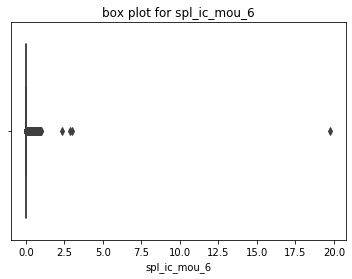

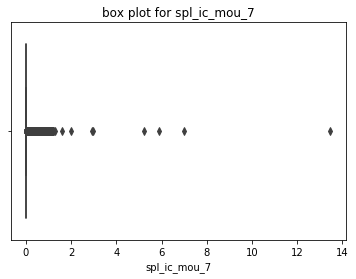

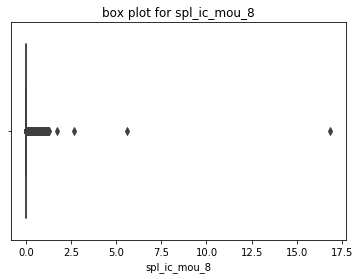

In [193]:
for col in ['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8']  :    
    plt.title("box plot for " + col)    
    ssn.boxplot(train[col])
    plt.show()
    
for col in ['spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8']  :    
    plt.title("box plot for " + col)    
    ssn.boxplot(train[col])
    plt.show()

#### Observations---

For ISD calls, 99% values are 0s 
For spl calls, 90% values are 0s but there is a usage after that.

### Recharge Amount

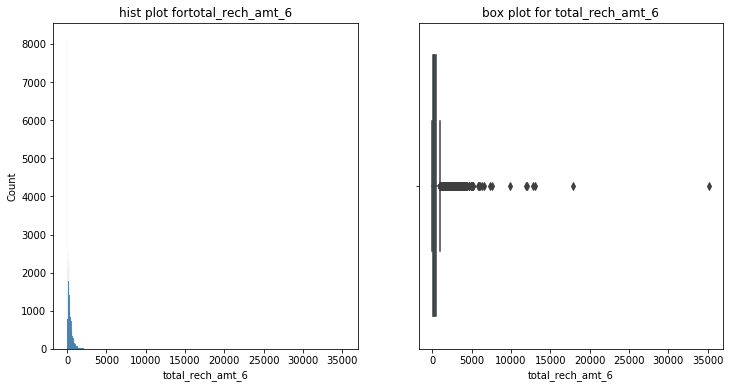

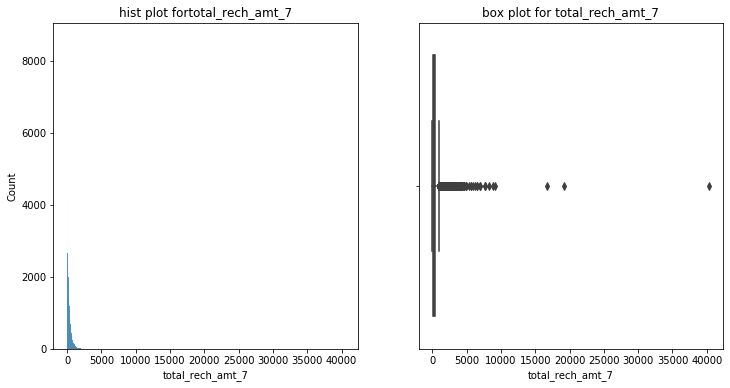

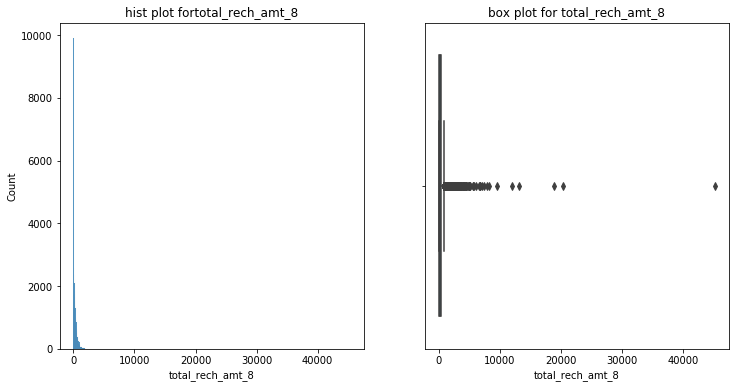

In [194]:
for col in ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']:
    plt.figure(figsize=[12,6])
    plt.subplot(1,2,1)
    plt.title("hist plot for" + col)
    ssn.histplot(train[col])
    plt.subplot(1,2,2)
    plt.title("box plot for " + col)    
    ssn.boxplot(train[col])
    plt.show()

#### Observations----

Recharge amount varing with having high value in the ouliers. These are high value customers.

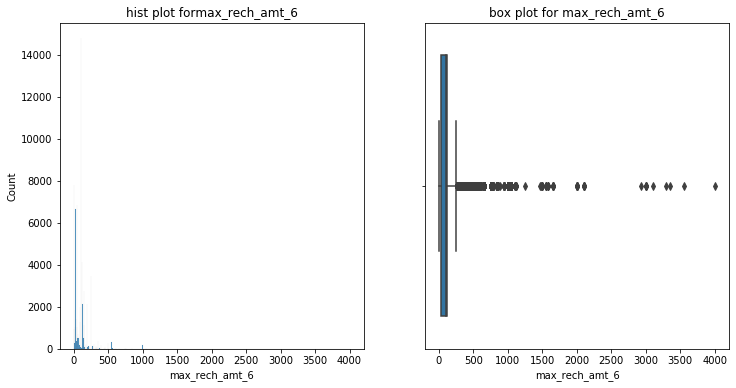

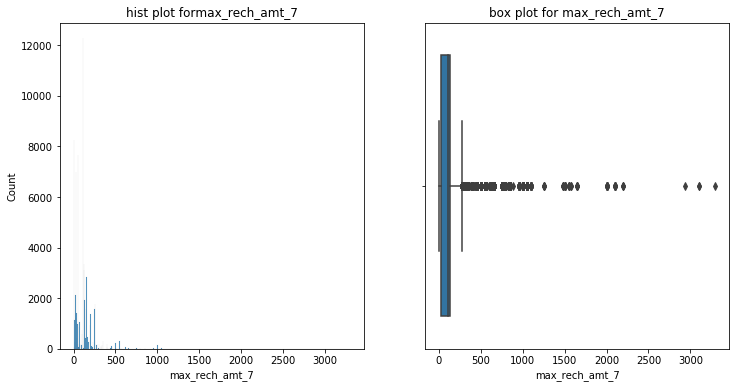

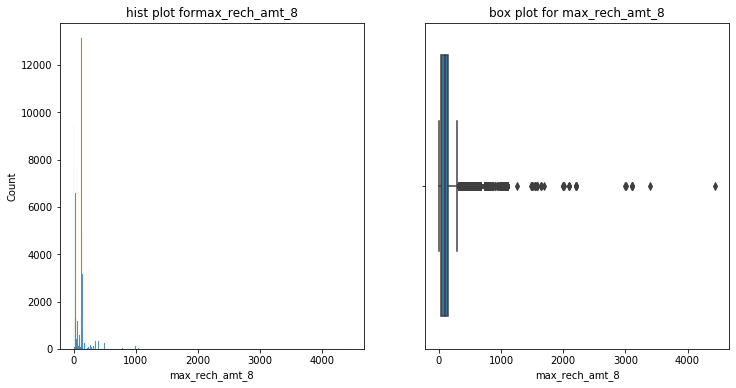

In [195]:
for col in ['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8']:
    plt.figure(figsize=[12,6])
    plt.subplot(1,2,1)
    plt.title("hist plot for" + col)
    ssn.histplot(train[col])
    plt.subplot(1,2,2)
    plt.title("box plot for " + col)    
    ssn.boxplot(train[col])
    plt.show()

#### Observations--

Majority of the recharges are between 0 and 200 and few going to 5k.

### Data Related Analysis

In [196]:
# Monthly 3g Schemes

print(train['monthly_3g_6'].value_counts())
print('----------------------------------------')
print(train['monthly_3g_7'].value_counts())
print('----------------------------------------')
print(train['monthly_3g_8'].value_counts())

0    65990
1     3150
2      595
3      167
4       59
5       16
6       10
7        8
9        2
8        2
Name: monthly_3g_6, dtype: int64
----------------------------------------
0     66062
1      2954
2       711
3       163
4        48
5        27
6        18
7         6
8         4
9         3
16        1
14        1
10        1
Name: monthly_3g_7, dtype: int64
----------------------------------------
0     65789
1      3180
2       738
3       183
4        65
5        24
6         7
7         6
8         3
9         2
16        1
10        1
Name: monthly_3g_8, dtype: int64


In [197]:
# Monthly 2g Schemes

print(train['monthly_2g_6'].value_counts())
print('----------------------------------------')
print(train['monthly_2g_7'].value_counts())
print('----------------------------------------')
print(train['monthly_2g_8'].value_counts())

0    64896
1     4688
2      389
3       20
4        6
Name: monthly_2g_6, dtype: int64
----------------------------------------
0    64695
1     4806
2      467
3       27
4        3
5        1
Name: monthly_2g_7, dtype: int64
----------------------------------------
0    64817
1     4738
2      413
3       24
4        6
5        1
Name: monthly_2g_8, dtype: int64


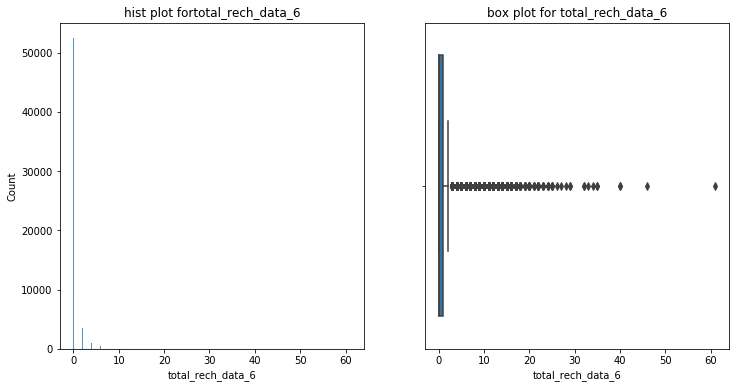

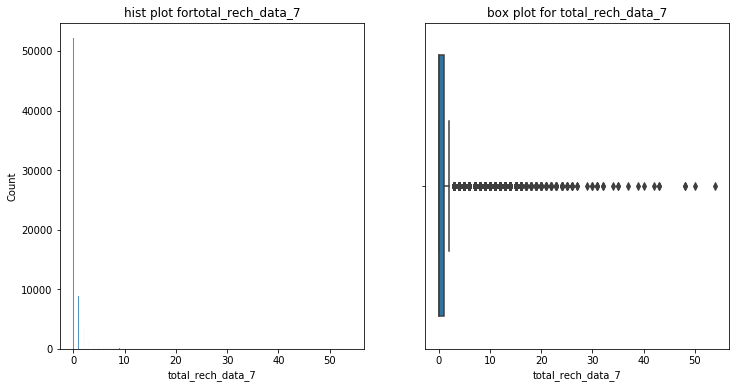

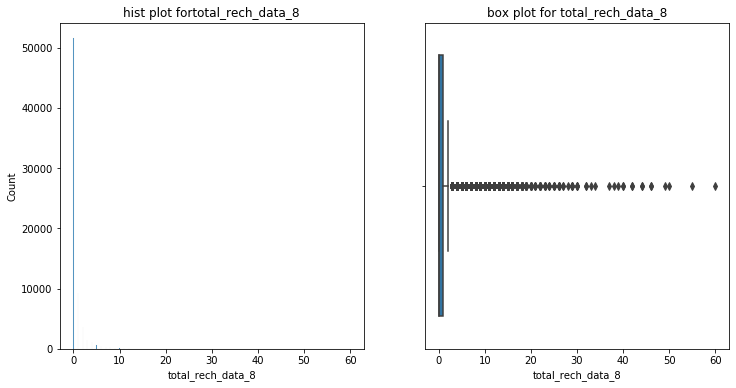

In [198]:
for col in ['total_rech_data_6','total_rech_data_7','total_rech_data_8']:
    plt.figure(figsize=[12,6])
    plt.subplot(1,2,1)
    plt.title("hist plot for" + col)
    ssn.histplot(train[col])
    plt.subplot(1,2,2)
    plt.title("box plot for " + col)    
    ssn.boxplot(train[col])
    plt.show()

#### Observations----

From the histogram we can say that total recharge wrt data are almost 0.

In [199]:
train_corr=train.corr()
train_corr.style.background_gradient(cmap='coolwarm', axis=None)

#### Observations---

There is lot of correlation between the features. 

We are not dropping the features as we are handling multicollinearity in a different way.
1. Using PCA and reducing the dimensionality
2. Will be using Random Forest Classifier in combination with RFE 

### Deriving New Features

In [200]:
train['delta_in_og']=train['total_og_mou_8']- train[['total_og_mou_7','total_og_mou_6']].max(axis=1)
train['delta_in_ic']=train['total_ic_mou_8']- train[['total_ic_mou_7','total_ic_mou_6']].max(axis=1)
train['delta_in_rech_num']=train['total_rech_num_8']- train[['total_rech_num_7','total_rech_num_6']].max(axis=1)
train['delta_in_rech_amnt']=train['total_rech_amt_8']- train[['total_rech_amt_7','total_rech_amt_6']].max(axis=1)
train['delta_in_rech_data']=train['total_rech_data_8']- train[['total_rech_data_7','total_rech_data_6']].max(axis=1)
train.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   0   31.277   87.009    7.527        48.58       124.38         1.29   
1   1    0.000  122.787   42.953         0.00         0.00         0.00   
2   2   60.806  103.176    0.000         0.53        15.93         0.00   
3   3  156.362  205.260  111.095         7.26        16.01         0.00   
4   4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               

In [201]:
train.describe()

id        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean   34999.000000    283.134365    278.185912    278.858826    127.887939   
std    20207.115084    334.213918    344.366927    351.924315    295.115497   
min        0.000000  -2258.709000  -1289.715000   -945.808000      0.000000   
25%    17499.500000     93.581000     86.714000     84.095000      5.430000   
50%    34999.000000    197.484000    191.588000    192.234000     30.830000   
75%    52498.500000    370.791000    365.369500    369.909000    113.100000   
max    69998.000000  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean     128.754731    125.943607    191.010582    189.585401    186.146273   
std      306.326345    304.990552    312.900706    318.492632    318.453812   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        4.910000      4.110000     28.790000     26.690000     23.780000   
50%       29.160000     27.840000     89.810000     85.590000     83.010000   
75%      108.940000    106.280000    223.540000    218.350000    216.410000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   69999.000000   69999.000000   69999.000000   69999.000000   
mean        9.379276       6.745305       6.634328      13.625476   
std        56.260778      54.892940      51.999899      72.055036   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   69999.000000   69999.000000      69999.000000      69999.000000   
mean        9.464386       9.254848         45.050076         44.394344   
std        57.409013      62.923987        148.238746        151.998993   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.010000          1.010000   
50%         0.000000       0.000000         10.660000         10.430000   
75%         0.000000       0.000000         38.680000         37.780000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean          43.269280         89.551272         87.313796         86.301054   
std          149.944829        159.846546        151.875981        150.286404   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.760000          7.290000          7.530000          6.440000   
50%           10.060000         37.680000         37.010000         35.940000   
75%           37.260000        105.685000        103.330000        103.110000   
max        10752.560000       4696.830000       4557.140000       4961.330000   

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean           3.595161          3.632045          3.467948          1.081499   
std           13.073900         13.324919         12.686917          5.631416   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000  

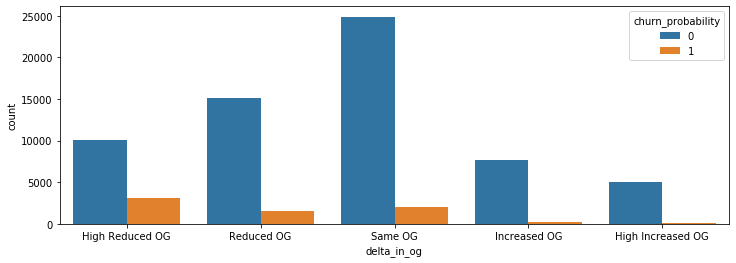

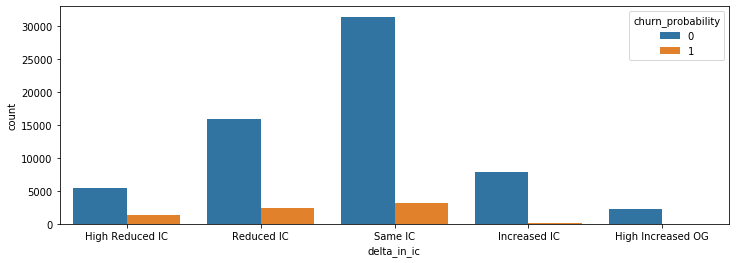

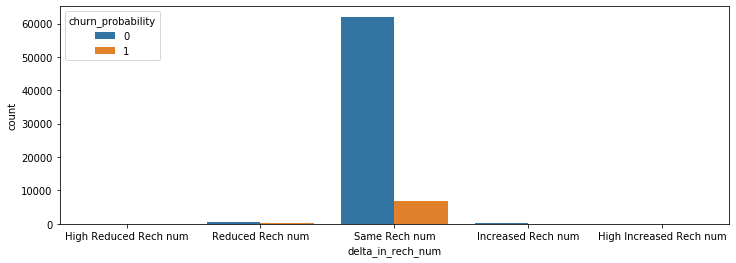

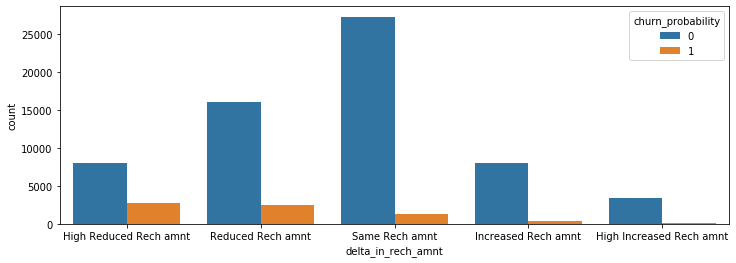

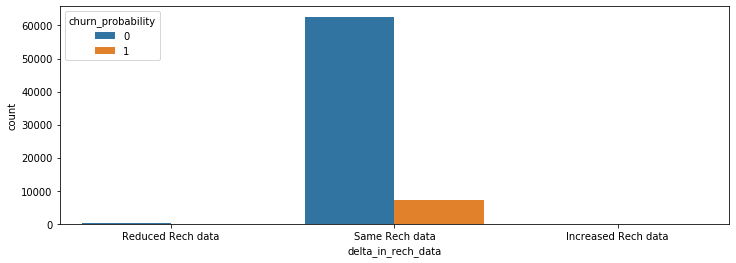

In [202]:
plt.figure(figsize=[12,4])
ssn.countplot(data=train,x=pd.cut(train['delta_in_og'],[-9000,-200,-50,50,200,12000],labels=["High Reduced OG","Reduced OG","Same OG","Increased OG","High Increased OG"]), hue='churn_probability')
plt.show()
plt.figure(figsize=[12,4])
ssn.countplot(data=train,x=pd.cut(train['delta_in_ic'],[-7000,-200,-50,50,200,5000],labels=["High Reduced IC","Reduced IC","Same IC","Increased IC","High Increased OG"]), hue='churn_probability')
plt.show()
plt.figure(figsize=[12,4])
ssn.countplot(data=train,x=pd.cut(train['delta_in_rech_num'],[-150,-50,-20,20,50,100],labels=["High Reduced Rech num","Reduced Rech num","Same Rech num","Increased Rech num","High Increased Rech num"]), hue='churn_probability')
plt.show()
plt.figure(figsize=[12,4])
ssn.countplot(data=train,x=pd.cut(train['delta_in_rech_amnt'],[-12000,-300,-100,100,300,14000],labels=["High Reduced Rech amnt","Reduced Rech amnt","Same Rech amnt","Increased Rech amnt","High Increased Rech amnt"]), hue='churn_probability')
plt.show()
plt.figure(figsize=[12,4])
ssn.countplot(data=train,x=pd.cut(train['delta_in_rech_data'],[-60,-10,10,60],labels=["Reduced Rech data","Same Rech data","Increased Rech data"]), hue='churn_probability')
plt.show()

#### Observations----

1. Wrt Out Going Calls/Incoming Calls - We see customers churn when the out going calls or incoming calls are reduced.
2. Recharge Number doesnt have much impact.
3. With Recharge Amounts we see that churn of customers increase a lot if the recharge value goes down. With increase in     recharge amount there is less chance that the customer will churn
4. Recharge data doesnt have much change.

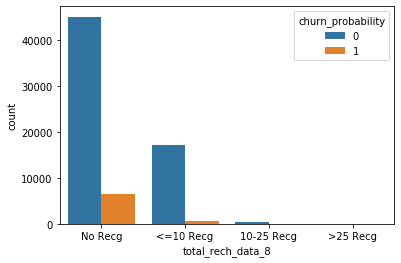

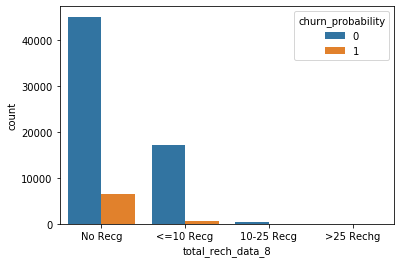

In [203]:
ssn.countplot(data=train,x=pd.cut(train['total_rech_data_8'],[-1,0,10,25,100],labels=["No Recg","<=10 Recg","10-25 Recg",">25 Recg"]), hue='churn_probability')
plt.show()
ssn.countplot(data=train,x=pd.cut(train['total_rech_data_8'],[-1,0,10,25,100],labels=["No Recg","<=10 Recg","10-25 Recg",">25 Rechg"]), hue='churn_probability')
plt.show()

#### Observations---

For normal recharge or data recharge customers with no recharge are more likely to churn.

#### Deriving new feature wrt last recharge

In [204]:
train['date_of_last_rech'] = pd.to_datetime(train['date_of_last_rech'])
maxdate=pd.to_datetime("9/1/2014")
train['No_of_days_without_Rech']=maxdate-train['date_of_last_rech']
train['No_of_days_without_Rech']=train['No_of_days_without_Rech'].dt.days

train['date_of_last_rech_data'] = pd.to_datetime(train['date_of_last_rech_data'])
train['No_of_days_without_Data_Rech']=maxdate-train['date_of_last_rech_data']
train['No_of_days_without_Data_Rech']=train['No_of_days_without_Data_Rech'].dt.days

train.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   0   31.277   87.009    7.527        48.58       124.38         1.29   
1   1    0.000  122.787   42.953         0.00         0.00         0.00   
2   2   60.806  103.176    0.000         0.53        15.93         0.00   
3   3  156.362  205.260  111.095         7.26        16.01         0.00   
4   4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               

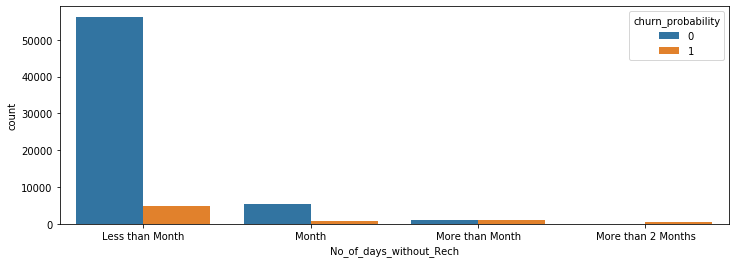

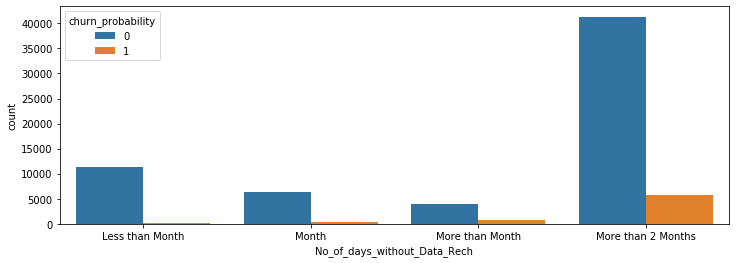

In [205]:
plt.figure(figsize=[12,4])
ssn.countplot(data=train,x=pd.cut(train['No_of_days_without_Rech'],[0,15,30,60,100],labels=["Less than Month","Month","More than Month","More than 2 Months"]), hue='churn_probability')
plt.show()
plt.figure(figsize=[12,4])
ssn.countplot(data=train,x=pd.cut(train['No_of_days_without_Data_Rech'],[0,15,30,60,100],labels=["Less than Month","Month","More than Month","More than 2 Months"]), hue='churn_probability')
plt.show()

#### Observations---

1. For Data Recharges customers are not recharging frequently and more likely to churn after 2 months
2. For Normal Recharges people perform regular recharges hence we see churn in all scenarios and who do not recharge for 2 months will for sure churn

In [206]:
train.drop(columns=['date_of_last_rech','date_of_last_rech_data','id'],axis=1,inplace=True)

## Modeling

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

#### Splitting the Data into train and test and doing scaling using StandardScaler

In [208]:
x,y=train,train.pop('churn_probability')
scaler=StandardScaler()

In [209]:
x1=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x1.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.753587 -0.555159 -0.771000    -0.268737    -0.014281    -0.408716   
1 -0.847171 -0.451263 -0.670336    -0.433352    -0.420322    -0.412946   
2 -0.665232 -0.508211 -0.792389    -0.431556    -0.368318    -0.412946   
3 -0.379318 -0.211770 -0.476708    -0.408751    -0.368057    -0.412946   
4 -0.126945 -0.435570 -0.503788    -0.361244    -0.404554    -0.392846   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0     -0.507419     -0.291706     -0.577219      -0.166712      -0.122882   
1     -0.610455     -0.513659     -0.487535      -0.166712      -0.122882   
2     -0.437907     -0.337641     -0.584536      -0.166712      -0.122882   
3     -0.390704     -0.348850     -0.426804      -0.166712      -0.122882   
4     -0.428320     -0.475604     -0.554296       0.786712      -0.122882   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0      -0.127584      -0.189100       -0.16486      -0.147081   
1      -0.127584      -0.189100       -0.16486      -0.147081   
2      -0.127584      -0.189100       -0.16486      -0.147081   
3      -0.127584      -0.189100       -0.16486      -0.121176   
4      -0.127584       0.029207       -0.16486      -0.147081   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0         -0.288861         -0.292072         -0.286703         -0.527142   
1         -0.303904         -0.292072         -0.288570         -0.560237   
2         -0.300329         -0.206676         -0.288570         -0.409404   
3         -0.256750         -0.266151         -0.288570         -0.323070   
4         -0.235366         -0.260295         -0.247688         -0.330390   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0         -0.469293         -0.558744         -0.274990         -0.272577   
1         -0.574906         -0.574248         -0.274990         -0.272577   
2         -0.574906         -0.574248         -0.274990         -0.272577   
3         -0.279334         -0.417014         -0.274990         -0.272577   
4         -0.444009         -0.543573          0.642111         -0.180268   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0         -0.273350         -0.192049         -0.168550         -0.211097   
1         -0.273350         -0.192049          2.665935          4.462066   
2         -0.273350          0.187965         -0.168550         -0.211097   
3         -0.273350         -0.192049         -0.168550          1.048571   
4          0.121547         -0.192049          1.099950         -0.211097   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0     -0.525667     -0.490882     -0.541619         -0.124120   
1     -0.555958     -0.556878     -0.552457         -0.309113   
2     -0.456838     -0.503472     -0.552457         -0.309113   
3     -0.375297     -0.355929     -0.454336         -0.308076   
4     -0.318978     -0.450149     -0.487015         -0.309113   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0          0.167241         -0.299563         -0.262354         -0.028200   
1         -0.307461         -0.303440         -0.336981         -0.334779   
2         -0.296240         -0.303440         -0.221796         -0.022724   
3         -0.261433         -0.303440         -0.275966         -0.236161   
4         -0.307461         -0.303440         -0.319667         -0.334779   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0         -0.325509         -0.135618          -0.12765         -0.133675   
1         -0.325509         -0.135618          -0.12765         -0.133675   
2         -0.325509         -0.135618          -0.12765         -0.133675   
3         -0.308056         -0.065417          -0.12765         -0.133675   
4         -0.325509         -0.135618          -0.12765         -0.133675   



In [210]:
# since we have high data we can use 80% data for training

x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=42)

#### Basic Logistic Regression Model without RFE

#### Since this is a class imbalance problem we will be using class_weight = "balanced" in all the models

In [211]:
logmodel=sm.GLM(y_train,sm.add_constant(x_train),family=sm.families.Binomial())
logmodel1=logmodel.fit()
logmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55855
Model Family:                Binomial   Df Model:                          143
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10914.
Date:                Wed, 11 May 2022   Deviance:                       21828.
Time:                        20:11:17   Pearson chi2:                 1.03e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -3.9073      0.045    -86.366      0.000      -3.996      -3.819
arpu_6                           0.1836      0.080      2.297      0.022       0.027       0.340
arpu_7                           0.1969      0.081      2.442      0.015       0.039       0.355
arpu_8                           0.2768      0.094      2.948      0.003       0.093       0.461
onnet_mou_6                      0.1714      1.268      0.135      0.892      -2.314       2.657
onnet_mou_7                      1.1022      0.942      1.171      0.242      -0.743       2.948
onnet_mou_8                     -1.0747      1.360     -0.790      0.429      -3.740       1.590
offnet_mou_6                     0.2419      1.324      0.183      0.855      -2.353       2.837
offnet_mou_7                     0.6572      0.932      0.705      0.481      -1.169       2.483
offnet_mou_8                    -1.3488      1.399     -0.964      0.335      -4.090       1.392
roam_ic_mou_6                    0.0571      0.022      2.626      0.009       0.014       0.100
roam_ic_mou_7                    0.0406      0.023      1.792      0.073      -0.004       0.085
roam_ic_mou_8                   -0.0495      0.025     -1.994      0.046      -0.098      -0.001
roam_og_mou_6                   -0.0432      0.307     -0.141      0.888      -0.646       0.559
roam_og_mou_7                   -0.1508      0.172     -0.879      0.379      -0.487       0.185
roam_og_mou_8                    0.3475      0.279      1.245      0.213      -0.200       0.894
loc_og_t2t_mou_6              1785.3599    524.579      3.403      0.001     757.205    2813.515
loc_og_t2t_mou_7              2198.3778    554.840      3.962      0.000    1110.912    3285.844
loc_og_t2t_mou_8              7045.8889    636.983     11.061      0.000    5797.424    8294.354
loc_og_t2m_mou_6              1925.0397    565.656      3.403      0.001     816.374    3033.705
loc_og_t2m_mou_7              2196.9138    554.393      3.963      0.000    1110.323    3283.504
loc_og_t2m_mou_8              7061.9804    638.441     11.061      0.000    5810.660    8313.301
loc_og_t2f_mou_6               157.4502     46.270      3.403      0.001      66.763     248.138
loc_og_t2f_mou_7               192.7650     48.645      3.963      0.000      97.423     288.106
loc_og_t2f_mou_8               596.2639     53.899     11.063      0.000     490.624     701.904
loc_og_t2c_mou_6                -0.0222      0.022     -0.989      0.323      -0.066       0.022
loc_og_t2c_mou_7                 0.0404      0.022      1.815      0.069      -0.003       0.084
loc_og_t2c_mou_8                 0.0010      0.033      0.030      0.976      -0.065       0.067
loc_og_mou_6                 -4082.0641   1111.841     -3.671      0.000   -

#### Observations----

Since there is lot of multicollinearity we do not get the intended model. There are many features having high p value indicating they are insignificant.

Lets do an RFE on this model.

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import xgboost as xgb
from sklearn.decomposition import PCA

In [213]:
LR=LogisticRegression(class_weight="balanced")
rfemodel=RFE(LR,n_features_to_select=40)
rfemodel=rfemodel.fit(x_train,y_train)

In [214]:
col=x_train.columns[rfemodel.support_]
x_train_sm=sm.add_constant(x_train[col])
logmodel=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial(),weights_column="balanced")
logmodel1=logmodel.fit()
logmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55958
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11456.
Date:                Wed, 11 May 2022   Deviance:                       22912.
Time:                        20:29:15   Pearson chi2:                 6.43e+06
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.0078      0.047    -84.436      0.000      -4.101      -3.915
arpu_6                      0.3541      0.068      5.181      0.000       0.220       0.488
arpu_7                      0.1564      0.074      2.124      0.034       0.012       0.301
arpu_8                      0.0580      0.088      0.656      0.512      -0.115       0.231
onnet_mou_7                 0.3085      0.101      3.043      0.002       0.110       0.507
onnet_mou_8                -0.2205      0.046     -4.778      0.000      -0.311      -0.130
offnet_mou_7                0.3388      0.105      3.237      0.001       0.134       0.544
offnet_mou_8               -0.9627      0.199     -4.835      0.000      -1.353      -0.572
roam_og_mou_8               0.2193      0.028      7.824      0.000       0.164       0.274
loc_og_t2t_mou_8           -0.2015      0.146     -1.379      0.168      -0.488       0.085
loc_og_t2m_mou_6           -0.1177      0.034     -3.443      0.001      -0.185      -0.051
loc_og_mou_8                0.0989      0.191      0.517      0.605      -0.276       0.474
std_og_t2m_mou_8            0.6150      0.166      3.715      0.000       0.291       0.939
isd_og_mou_6               -0.1951      0.051     -3.802      0.000      -0.296      -0.095
isd_og_mou_7                0.2175      0.067      3.225      0.001       0.085       0.350
og_others_8                -1.3586      0.930     -1.460      0.144      -3.182       0.465
total_og_mou_7             -0.3503      0.145     -2.420      0.016      -0.634      -0.067
loc_ic_t2t_mou_7            0.1565      0.052      3.025      0.002       0.055       0.258
loc_ic_t2t_mou_8          1.36e+04    510.576     26.629      0.000    1.26e+04    1.46e+04
loc_ic_t2m_mou_8         1.613e+04    605.753     26.629      0.000    1.49e+04    1.73e+04
loc_ic_t2f_mou_8         3714.1976    139.491     26.627      0.000    3440.800    3987.595
loc_ic_mou_8            -2.421e+04    909.056    -26.630      0.000    -2.6e+04   -2.24e+04
std_ic_t2f_mou_8           -0.3691      0.114     -3.244      0.001      -0.592      -0.146
total_ic_mou_6             -0.2665      0.071     -3.738      0.000      -0.406      -0.127
total_ic_mou_8             -0.7567      0.150     -5.031      0.000      -1.051      -0.462
spl_ic_mou_8               -0.9297      0.066    -14.135      0.000      -1.059      -0.801
isd_ic_mou_8                0.2343      0.042      5.544      0.000       0.151       0.317
total_rech_num_6           -0.1738      0.036     -4.880      0.000      -0.244      -0.104
total_rech_amt_6           -0.2819      0.087     -3.243      0.001      -0.452      -0.112
total_rech_amt_7           -0.3980      0.083     -4.778      0.000      -0.561      -0.235
total_rech_amt_8            0.3650      0.118  

#### Observations---

1. Now we have reduced to 40 features. All the p values are significant too.
2. We have both kinds of features which tell whether the customer is likely to churn or not.

In [215]:
y_pred=logmodel1.predict(x_train_sm)
y_pred

47338    0.007925
67455    0.039274
12308    0.230170
52334    0.275806
664      0.512422
           ...   
37194    0.579970
6265     0.013853
54886    0.042937
860      0.042051
15795    0.009519
Length: 55999, dtype: float64

In [216]:
roc_auc_score(y_train, y_pred)

0.9028749310595963

#### Observations---

We get Area under the curve to be 90%

In [217]:
def find_optimum_threshold(actual,probs):
    cutoff_df = pd.DataFrame( columns = ['threshold_prob','accuracy','sensitivity','specificity'])
    num = [float(x)/20 for x in range(20)]    
    tmap = np.vectorize(lambda x,i: 1 if x > i else 0)
    for i in num:
        pred = tmap(probs,i)
        cm = confusion_matrix(actual, pred)
        total = sum(sum(cm))
        accuracy = (cm[0,0]+cm[1,1])/total
        specificity = cm[0,0]/(cm[0,0]+cm[0,1])
        sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
    cutoff_df.plot.line(x='threshold_prob',y=['accuracy','sensitivity','specificity'],figsize=(10,5),title='Accuracy,Sensitivity, Specificity vs Threshold Probabilities')
    plt.show()
    return cutoff_df

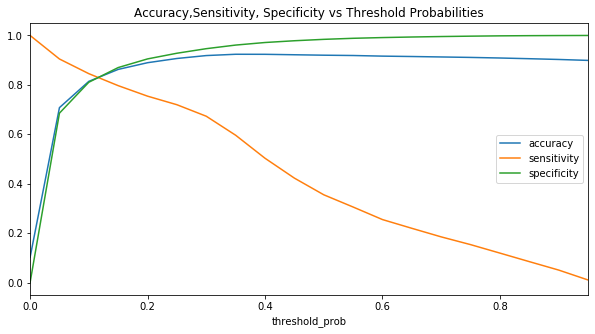

threshold_prob  accuracy  sensitivity  specificity
0.00            0.00  0.101966     1.000000     0.000000
0.05            0.05  0.707852     0.904729     0.685498
0.10            0.10  0.814157     0.845359     0.810615
0.15            0.15  0.862569     0.796848     0.870031
0.20            0.20  0.889677     0.754291     0.905049
0.25            0.25  0.906766     0.719615     0.928016
0.30            0.30  0.918588     0.673030     0.946469
0.35            0.35  0.923838     0.596147     0.961045
0.40            0.40  0.923659     0.502977     0.971425
0.45            0.45  0.921856     0.422592     0.978544
0.50            0.50  0.920070     0.355166     0.984211
0.55            0.55  0.918838     0.305604     0.988467
0.60            0.60  0.916302     0.254816     0.991410
0.65            0.65  0.914748     0.219440     0.993696
0.70            0.70  0.912927     0.184764     0.995605
0.75            0.75  0.911088     0.153415     0.997117
0.80            0.80  0.908713     0.119089     0.998369
0.85            0.85  0.905873     0.084588     0.999125
0.90            0.90  0.902802     0.050438     0.999582
0.95            0.95  0.899016     0.010333     0.999920

In [218]:
find_optimum_threshold(y_train,y_pred)

#### Observations---

We can see that if we increase the Accuracy, sensitivity decreases. So there is a trade of between them.

With 90% accuracy we will be getting sensitivity to be 71%.

In [219]:
y_test_pred=logmodel1.predict(sm.add_constant(x_test[col]))
roc_auc_score(y_test, y_test_pred)

0.9111075440586884

In [220]:
optimum_threshold = 0.25

final_labels = np.vectorize(lambda x: 1 if x > optimum_threshold else 0)
def predict_labels(model,X):
    y_prob = model.predict(X)
    y_pred = final_labels(y_prob)
    return y_pred

def print_metrics(actual,pred):
    cm = confusion_matrix(actual, pred)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    print(f"Accuracy: {round(accuracy,3)}")
    print(f"Sensitivity: {round(sensitivity,3)}")
    print(f"Specificity: {round(specificity,3)}")

In [221]:
print('Train Metrics')
print('=================')
print_metrics(y_train,predict_labels(logmodel1,x_train_sm))
print(f"Precision : {precision_score(y_train, predict_labels(logmodel1,x_train_sm))}")
print(f"Recall : {recall_score(y_train, predict_labels(logmodel1,x_train_sm))}")
print('Test Metrics')
print('=================')
print_metrics(y_test,predict_labels(logmodel1,sm.add_constant(x_test[col])))
print(f"Precision : {precision_score(y_test, predict_labels(logmodel1,sm.add_constant(x_test[col])))}")
print(f"Recall : {recall_score(y_test, predict_labels(logmodel1,sm.add_constant(x_test[col])))}")

Train Metrics
Accuracy: 0.907
Sensitivity: 0.72
Specificity: 0.928
Precision : 0.5316341053176349
Recall : 0.7196147110332749
Test Metrics
Accuracy: 0.911
Sensitivity: 0.722
Specificity: 0.933
Precision : 0.5477843032568073
Recall : 0.7215189873417721


#### Observations---

We got good accuracy and sensitivity on the test data set also.

Lets try to increase the Accuracy using PCA(it reduces the dimensionality)

In [222]:
pca = PCA(0.95,random_state=101)
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)
X_train_pca.shape, X_test_pca.shape

((55999, 74), (14000, 74))

#### Observations---

So 74 features explain 95% of variance in the data

In [225]:
RFC1=RandomForestClassifier(random_state=42,oob_score=True,class_weight="balanced",criterion="entropy")
params={'max_depth':[2,3,5,10,20,50],
       'min_samples_leaf':[5,10,15,20],
       'n_estimators':[10,20,50,100]}
RFCModel=RandomizedSearchCV(estimator=RFC1,param_distributions=params,scoring= 'accuracy',cv=4,n_jobs=-1)
RFCModel.fit(X_train_pca,y_train)
print(f"Best Score: {RFCModel.best_score_}")
print(RFCModel.best_estimator_)
print(f"OOB Score: {RFCModel.best_estimator_.oob_score_}")
print("Confusion Matrix")
print(confusion_matrix(y_test, RFCModel.best_estimator_.predict(X_test_pca)))
print('Train Metrics')
print('=================')
print(f"roc auc score: {roc_auc_score(y_train, RFCModel.predict(X_train_pca))}")
print_metrics(y_train,RFCModel.best_estimator_.predict(X_train_pca))
print('Test Metrics')
print('=================')
print(f"roc auc score: {roc_auc_score(y_test, RFCModel.predict(X_test_pca))}")
print_metrics(y_test,RFCModel.best_estimator_.predict(X_test_pca))

Best Score: 0.9186414043107912
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=True,
                       random_state=42, verbose=0, warm_start=False)
OOB Score: 0.915177056733156
Confusion Matrix
[[12151   427]
 [  668   754]]
Train Metrics
roc auc score: 0.9830614425155004
Accuracy: 0.982
Sensitivity: 0.984
Specificity: 0.982
Test Metrics
roc auc score: 0.7481454681996718
Accuracy: 0.922
Sensitivity: 0.53
Specificity: 0.966


In [226]:
print("on train data")
print(f"Precision : {precision_score(y_train, RFCModel.predict(X_train_pca))}")
print(f"Recall : {recall_score(y_train, RFCModel.predict(X_train_pca))}")
print("on test data")
print(f"Precision : {precision_score(y_test, RFCModel.predict(X_test_pca))}")
print(f"Recall : {recall_score(y_test, RFCModel.predict(X_test_pca))}")

on train data
Precision : 0.8605114071352014
Recall : 0.9842381786339754
on test data
Precision : 0.6384419983065199
Recall : 0.530239099859353


#### Observations---

On test data we see that have very low sensitvity though we have high accuracy generated on PCA performed dataset.

In [227]:
RFC1=RandomForestClassifier(random_state=42,oob_score=True,class_weight="balanced",criterion="entropy")
params={'max_depth':[2,3,5,10,20,50],
       'min_samples_leaf':[5,10,15,20],
       'n_estimators':[10,20,50,100]}
RFCModel1=RandomizedSearchCV(estimator=RFC1,param_distributions=params,scoring= 'accuracy',cv=4,n_jobs=-1)
RFCModel1.fit(x_train,y_train)
print(RFCModel1.best_score_)
print(RFCModel1.best_estimator_)
print(RFCModel1.best_estimator_.oob_score_)
print(roc_auc_score(y_train, RFCModel1.predict(x_train)))
print(roc_auc_score(y_test, RFCModel1.predict(x_test)))
print(accuracy_score(y_train, RFCModel1.best_estimator_.predict(x_train)))
print(accuracy_score(y_test, RFCModel1.best_estimator_.predict(x_test)))
print(confusion_matrix(y_test, RFCModel1.best_estimator_.predict(x_test)))

0.9366238682833622
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=42, verbose=0, warm_start=False)
0.9370167324416507
0.9570165441993961
0.8518631642908308
0.9653208093001661
0.9383571428571429
[[12080   498]
 [  365  1057]]


In [228]:
print('Train Metrics')
print('=================')
print(f"roc auc score: {roc_auc_score(y_train, RFCModel1.predict(x_train))}")
print_metrics(y_train,RFCModel1.best_estimator_.predict(x_train))
print(f"Precision : {precision_score(y_train, RFCModel1.predict(x_train))}")
print(f"Recall : {recall_score(y_train, RFCModel1.predict(x_train))}")
print('Test Metrics')
print('=================')
print(f"roc auc score: {roc_auc_score(y_test, RFCModel1.predict(x_test))}")
print_metrics(y_test,RFCModel1.best_estimator_.predict(x_test))
print(f"Precision : {precision_score(y_test, RFCModel1.predict(x_test))}")
print(f"Recall : {recall_score(y_test, RFCModel1.predict(x_test))}")

Train Metrics
roc auc score: 0.9570165441993961
Accuracy: 0.965
Sensitivity: 0.947
Specificity: 0.967
Precision : 0.7675376313547287
Recall : 0.946584938704028
Test Metrics
roc auc score: 0.8518631642908308
Accuracy: 0.938
Sensitivity: 0.743
Specificity: 0.96
Precision : 0.6797427652733119
Recall : 0.7433192686357243


#### Observations----

Now we trained on the data set without doing PCA. Accuracy got increased to 94.2 and sensitivity also 70% on test data.Precision and Recall values also increased

In [229]:
feturesRFC=pd.DataFrame(RFCModel1.best_estimator_.feature_importances_,x_train.columns)
cols=feturesRFC.sort_values(0,ascending=False)
TopFeatures=cols.index[:20]
x_train_sm=sm.add_constant(x_train[TopFeatures])
logmodel=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial(),weights_column="balanced")
logmodel1=logmodel.fit()
logmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55978
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12575.
Date:                Wed, 11 May 2022   Deviance:                       25150.
Time:                        21:34:35   Pearson chi2:                 4.56e+10
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.0783      0.049    -83.147      0.000      -4.174      -3.982
loc_ic_mou_8               -7.0478      0.763     -9.239      0.000      -8.543      -5.553
loc_ic_t2m_mou_8            2.4545      0.533      4.607      0.000       1.410       3.499
loc_og_t2m_mou_8            0.2065      0.612      0.338      0.736      -0.992       1.405
loc_og_mou_8               -0.9749      0.955     -1.021      0.307      -2.846       0.896
total_ic_mou_8              0.0626      0.117      0.536      0.592      -0.167       0.292
total_og_mou_8              0.0228      0.054      0.420      0.675      -0.084       0.129
last_day_rch_amt_8         -0.4655      0.038    -12.227      0.000      -0.540      -0.391
roam_og_mou_8               0.2068      0.018     11.315      0.000       0.171       0.243
arpu_8                     -0.5138      0.098     -5.230      0.000      -0.706      -0.321
No_of_days_without_Rech     0.4577      0.014     33.705      0.000       0.431       0.484
roam_ic_mou_8               0.0235      0.015      1.569      0.117      -0.006       0.053
loc_og_t2t_mou_8            0.3506      0.605      0.580      0.562      -0.834       1.536
loc_ic_t2t_mou_8            2.8712      0.447      6.429      0.000       1.996       3.747
total_rech_amt_8            0.3281      0.108      3.029      0.002       0.116       0.540
delta_in_og                -0.1256      0.020     -6.177      0.000      -0.166      -0.086
offnet_mou_8               -0.0539      0.049     -1.096      0.273      -0.150       0.042
std_ic_mou_8               -0.4718      0.075     -6.313      0.000      -0.618      -0.325
max_rech_amt_8             -0.0535      0.036     -1.471      0.141      -0.125       0.018
delta_in_ic                -0.2351      0.019    -12.532      0.000      -0.272      -0.198
delta_in_rech_amnt         -0.3283      0.025    -13.014      0.000      -0.378      -0.279
===========================================================================================
"""

In [230]:
print('Train Metrics')
print('=================')
print_metrics(y_train,predict_labels(logmodel1,x_train_sm))
print(f"Precision : {precision_score(y_train, predict_labels(logmodel1,x_train_sm))}")
print(f"Recall : {recall_score(y_train, predict_labels(logmodel1,x_train_sm))}")
print('Test Metrics')
print('=================')
print_metrics(y_test,predict_labels(logmodel1,sm.add_constant(x_test[TopFeatures])))
print(f"Precision : {precision_score(y_test, predict_labels(logmodel1,sm.add_constant(x_test[TopFeatures])))}")
print(f"Recall : {recall_score(y_test, predict_labels(logmodel1,sm.add_constant(x_test[TopFeatures])))}")

Train Metrics
Accuracy: 0.91
Sensitivity: 0.618
Specificity: 0.944
Precision : 0.5538799874332391
Recall : 0.6175131348511383
Test Metrics
Accuracy: 0.909
Sensitivity: 0.62
Specificity: 0.941
Precision : 0.5437731196054254
Recall : 0.620253164556962


#### Observations----

Sensitivity is just 62% which is very less compared to original RFC values.

In [231]:
xgb_cfl = xgb.XGBClassifier(objective = 'binary:logistic',random_state=42)
params = {
        'n_estimators' : [10,20,50,100], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth':[2,3,5,10,20,50,70,100]
        }
xgb_model =RandomizedSearchCV(estimator=xgb_cfl,param_distributions=params,scoring= 'accuracy',cv=4,n_jobs=6,verbose=2)
xgb_model.fit(X_train_pca,y_train)
print(f"Best Score: {xgb_model.best_score_}")
print(xgb_model.best_estimator_)
print("Confusion Matrix")
print(confusion_matrix(y_test, xgb_model.best_estimator_.predict(X_test_pca)))
print('Train Metrics')
print('=================')
print(f"roc auc score: {roc_auc_score(y_train, xgb_model.predict(X_train_pca))}")
print_metrics(y_train,xgb_model.best_estimator_.predict(X_train_pca))
print(f"Precision : {precision_score(y_train, xgb_model.predict(X_train_pca))}")
print(f"Recall : {recall_score(y_train, xgb_model.predict(X_train_pca))}")
print('Test Metrics')
print('=================')
print(f"roc auc score: {roc_auc_score(y_test, xgb_model.predict(X_test_pca))}")
print_metrics(y_test,xgb_model.best_estimator_.predict(X_test_pca))
print(f"Precision : {precision_score(y_test, xgb_model.predict(X_test_pca))}")
print(f"Recall : {recall_score(y_test, xgb_model.predict(X_test_pca))}")

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:  4.8min
[Parallel(n_jobs=6)]: Done  40 out of  40 | elapsed:  6.4min finished


Best Score: 0.9242665047590135
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42, reg_alpha=0, ...)
Confusion Matrix
[[12300   278]
 [  761   661]]
Train Metrics
roc auc score: 0.8646413032148785
Accuracy: 0.969
Sensitivity: 0.734
Specificity: 0.995
Precision : 0.9466907612378586
Recall : 0.7339754816112084
Test Metrics
roc auc score: 0.7213680864877148
Ac

#### Observations----

Again Sensitivity and recall are very less for the test data set

In [232]:
xgb_cfl = xgb.XGBClassifier(objective = 'binary:logistic')
params = {
        'n_estimators' : [10,20,50,100], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }
model2=RandomizedSearchCV(estimator=xgb_cfl,param_distributions=params,scoring= 'accuracy',cv=4,n_jobs=8)
model2.fit(x_train,y_train)
print(f"Best Score: {model2.best_score_}")
print(model2.best_estimator_)
print("Confusion Matrix")
print(confusion_matrix(y_test, model2.best_estimator_.predict(x_test)))
print('Train Metrics')
print('=================')
print(f"roc auc score: {roc_auc_score(y_train, model2.predict(x_train))}")
print_metrics(y_train,model2.best_estimator_.predict(x_train))
print(f"Precision : {precision_score(y_train, model2.predict(x_train))}")
print(f"Recall : {recall_score(y_train, model2.predict(x_train))}")
print('Test Metrics')
print('=================')
print(f"roc auc score: {roc_auc_score(y_test, model2.predict(x_test))}")
print_metrics(y_test,model2.best_estimator_.predict(x_test))
print(f"Precision : {precision_score(y_test, model2.predict(x_test))}")
print(f"Recall : {recall_score(y_test, model2.predict(x_test))}")

Best Score: 0.9429989821246808
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)
Confusion Matrix
[[12280   298]
 [  480   942]]
Train Metrics
roc auc score: 0.8181782658754292
Accuracy: 0.947
Sensitivity: 0.657
Specificity: 0.979
Precision : 0.7839080459770115
Recall : 0.6569176882661997
Test Metrics
roc auc score: 0.8193775482340407
Ac

#### Observations----

Accuracy improved compared to other models. Sensitivity we got around 67% and precision and recall to be 75% and 67%

## Conclusions-

1. To handle class imbalance for all models we used class_weight= 'balanced'
2. Different models gave different Accuracy,Precision,Recall,Sensitivity,Sprecivity.


|Model/Metrics| Logistic Regression using RFE | Random Forest Classifier without PCA | Logistic Regression with important features (from RFC) | Random Forest Classifier  with PCA | XGBoost Classifier without PCA | XGBoost Classifier with PCA |
| ----------- | ----------- |----------- |----------- |----------- |----------- |----------- |
| ROC_AUC_SCORE | 0.91 | 0.85 | 0.90 | 0.74 | 0.83 | 0.73 |
| Accuracy      | 0.91 | 0.94 | 0.91 | 0.92 | 0.95 | 0.93 |
| Sensitivity   | 0.72 | 0.74 | 0.62 | 0.53 | 0.68 | 0.48 |
| Specificity   | 0.93 | 0.96 | 0.94 | 0.97 | 0.98 | 0.98 |
| Precision     | 0.55 | 0.68 | 0.54 | 0.63 | 0.75 | 0.71 |
| Recall        | 0.72 | 0.74 | 0.62 | 0.53 | 0.68 | 0.48 |
            
#### With RFC we get good Accuracy and sensitivity is also good. For Logistic Regression with RFE we have high sensitivity and recall. 

Final Model(without PCA)--- RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=42, verbose=0, warm_start=False) 


### Important driving variables/features ---

#### Top Features having positive correlation(higher these higher the churn probability)
1. loc_ic_t2m_mou_8 (local incoming call to other operator mobile for a given month)
2. loc_ic_t2t_mou_8 (local incoming calls to same network for a given month)
3. No_of_days_without_Rech (no of days without recharge increases the churn prob also increases)
4. roam_og_mou_8(roaming outgoing)

#### Top Features having negative correlation(higher these lesser the churn probability)
1. loc_ic_mou_8 (overall local incoming calls for the month)
2. arpu_8 (average revenue per user increases churn decreases)
3. std_ic_mou_8 (if std incoming calls increases churn prob decreases)
4. delta_in_ic (if incoming calls increses wrt previous months churn prob decreases)
5. delta_in_rech_amnt (if recharge amount increses wrt previous months churn prob decreases)
6. delta_in_og (if outgoing calls increses wrt previous months churn prob decreases)

In [233]:
def ForUnseenData(train):        
    train['date_of_last_rech']=train.apply(lambda x: x['date_of_last_rech_8'] if (not pd.isnull(x['date_of_last_rech_8'])) else (x['date_of_last_rech_7'] if (not pd.isnull(x['date_of_last_rech_7'])) else (x['date_of_last_rech_6'] if (not pd.isnull(x['date_of_last_rech_6'])) else "5/30/2014")),axis=1)
    train['date_of_last_rech_data']=train.apply(lambda x: x['date_of_last_rech_data_8'] if (not pd.isnull(x['date_of_last_rech_data_8'])) else (x['date_of_last_rech_data_7'] if (not pd.isnull(x['date_of_last_rech_data_7'])) else (x['date_of_last_rech_data_6'] if (not pd.isnull(x['date_of_last_rech_data_6'])) else "5/30/2014")),axis=1)
    train.drop(columns=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1,inplace=True)
    
    for col in train.columns[train.isna().sum()>0]:
        train[col].fillna(0,inplace=True)
        
    train['delta_in_og']=train['total_og_mou_8']- train[['total_og_mou_7','total_og_mou_6']].max(axis=1)
    train['delta_in_ic']=train['total_ic_mou_8']- train[['total_ic_mou_7','total_ic_mou_6']].max(axis=1)
    train['delta_in_rech_num']=train['total_rech_num_8']- train[['total_rech_num_7','total_rech_num_6']].max(axis=1)
    train['delta_in_rech_amnt']=train['total_rech_amt_8']- train[['total_rech_amt_7','total_rech_amt_6']].max(axis=1)
    train['delta_in_rech_data']=train['total_rech_data_8']- train[['total_rech_data_7','total_rech_data_6']].max(axis=1)
    
    train['date_of_last_rech'] = pd.to_datetime(train['date_of_last_rech'])
    train['No_of_days_without_Rech']=maxdate-train['date_of_last_rech']
    train['No_of_days_without_Rech']=train['No_of_days_without_Rech'].dt.days

    train['date_of_last_rech_data'] = pd.to_datetime(train['date_of_last_rech_data'])
    train['No_of_days_without_Data_Rech']=maxdate-train['date_of_last_rech_data']
    train['No_of_days_without_Data_Rech']=train['No_of_days_without_Data_Rech'].dt.days
    
    train=train[x.columns]

    train=pd.DataFrame(scaler.transform(train),columns=train.columns)    
    
    #return pca.transform(train)
    
    return train
    

In [237]:
unseen_churn_data = pd.read_csv('test.csv')
finaltestdata=ForUnseenData(unseen_churn_data)

In [238]:
y_pred_unseen = RFCModel1.predict(finaltestdata)
result = pd.DataFrame(columns = ['id','churn_probability'])
result['id'] = unseen_churn_data['id']
result['churn_probability'] = y_pred_unseen
result.to_csv('Submission.csv',index=False)